# 03 Likelihood modeling with PyTorch 
## Introduction
The fundamental assumption of statistics is that a data set $\{ \mathbf{x} \}$ may be considered to be a random sample from a probability density function (pdf) $g(x)$ if $x$ is continuous or a probability mass function (pmf) if $x$ is discrete. In general, the form of $g(x)$ is unknown. We do not know, for example, the pmf from which all photographs of human faces on the web have been sampled, nor do we know the pmf of the COVID-19 data. In order to say anything useful about the function $g(x)$, which is presumed to exist (in the same sense that the set of real numbers exist), we devise a model of it $p(x, \theta)$ with the hope that for some optimal choice of the parameters $\theta$, say $\theta^*$, the model will approximate the unknown function $g(x)$. 

The joint density $p(x, \theta)$ is usually factored as follows: $p(x, \theta) = p(x | \theta) \pi(\theta)$, where $p(x | \theta)$ is the conditional density of $x$ given $\theta$ and $p(\theta)$ is often called a *prior density*. When data $\mathbf{x}$ are entered into the density $p(x | \theta)$, the latter is referred to as the __likelihood function__. It would make sense to use a different symbol for the likelihood function; for example, some textbooks and papers use the symbol $L(\theta) \equiv p(\mathbf{x} | \theta)$. However, we prefer to use the same symbol for both the density and the likelihood in order to emphasize their close relationship. 

While there is disagreement about whether one should, or should not, use the prior $\pi(\theta)$ in making statistical inferences, everyone agrees that the likelihood function $p(x | \theta)$ is the key ingredient and, ideally, ought to be used. In particular, the likelihood plays a central role in the frequentist and Bayesian approaches to statistical inference. Given their central role, a great deal of effort has been devoted to finding feasible ways of approximating likelihoods when their construction is intractable or cumbersome. 

In this exercise, we use an important result in machine learning to model a 2-parameter, 1D conditional probability density $p(x|\theta = a, c)$ given a simulated data set. To do so, we take advantage of a result first obtained in the early 1990s in context of neural networks$^{1,2}$, but which is in fact independent of the underlying model used. If one fits a model, $f(\mathbf{x}, \omega)$ with parameters $\omega$ to a balanced data set comprising two classes of data, one labeled with target $t = 1$ and the other labeled with target $t = 0$, and we use either the quadratic loss or the cross-entropy loss, then the optimized model, $f(\mathbf{x}, \omega^*)$, will approximate the function

\begin{align}
    D(\mathbf{x}) & = \frac{p(\mathbf{x}|1)}{p(\mathbf{x}|1) + p(\mathbf{x}|0)}.
\end{align}

A balanced data set is one in which the number of events in each class is the same. The optimized model is found by minimizing an *objective function* called the __empirical risk__. See 01_classification.ipynb for details.

In order to create a simulated data set that can be used to model conditional densities and, therefore, likelihoods, write $\mathbf{x} = x, \theta$. From the above result, it follows that

\begin{align}
    \frac{D_q(x, \theta)}{1 - D_q(x, \theta)} & = \frac{p(x, \theta|1)}{p(x, \theta|0)}, \\
                    & = \frac{p(x, \theta|1)}{q(x | \theta) \, p(\theta|1)},
\end{align}

where we have constructed the $t = 0$ data set so that its density $p(x, \theta | 0) = q(x | \theta) \, p(\theta|1)$ with the form of $q(x | \theta)$ and the *marginal* density $p(\theta | 1) = \int p(x, \theta| 1) \, dx$ *chosen* by us. The function $D$ has been written as $D_q$ to emphasize the fact that $D$ depends on the form of $q(x | \theta)$. Then, we can write

\begin{align}
    p(x | \theta, 1) & = \frac{p(x, \theta|1)}{p(\theta|1)}, \\
    & = q(x | \theta) \, C(x, \theta),\\
    \textrm{where } \, \, C(x, \theta) & = \color{blue}{ \frac{D_q(x, \theta)}{1 - D_q(x, \theta)}} .
\end{align}

From this result we see that if $q(x | \theta)$ is a tractable approximation to $p(x | \theta, 0)$, then the factor $C(x, \theta)$ is, ideally, a correction factor of order unity. However, the result also shows that we can also keep things simple and choose $q(x | \theta)$ to be a uniform density in which case $C(x, \theta)$ is directly proportional to conditional density $p(x | \theta,  1)$.

Note that the sampling over $\theta$ in both the $t = 1$ and $t = 0$ samples is required to be the same because of the definition of conditional probability: $p(x | \theta, 1) = p(x, \theta|1) \, / \, p(\theta|1)$.

## Exercise

The goal in this exercise is to model a 2-parameter likelihood function in which the parameter space is bounded. The algorithm for generating the data $\{ (x_m, \theta_m) \}$ is given in 00_generate_data.ipynb. 

## References

  1. E.A. Wan, *Neural network classification: a Bayesian interpretation*, IEEE Transactions on Neural Networks, Vol. 1, No. 4, pp 303-305 (1990); doi: 10.1109/72.80269.
  1. M.D. Richard and R.P. Lippmann, *Neural Network Classifiers Estimate Bayesian a posteriori Probabilities*, Neural Computation, Vol. 3, No. 4, pp 461-483 (1991);
doi: 10.1162/neco.1991.3.4.461.

### Using Google Drive in Google Colab
It is often convenient to have access to Google Drive when this notebook is run in Google Colab. In order to gain access to Google Drive from the notebook do the following:
  1. Place this notebook in a folder on Google Drive. Click on the notebook and choose to open it with Google Colab.
  1. Once the notebook is running in Google Colab, uncomment and execute the cell below and follow the authentication instructions.
  1. To use hardware acceleration select the menu item Runtime/Change runtime type and select GPU.

In [1]:
#from google.colab import drive 
#drive.mount('/content/gdrive') 

Set BASE to My Drive folder, or to "./" if this notebook is running on your local machine.

In [2]:
#BASE = '/content/gdrive/My Drive/colab_notebooks'
BASE = './'

### Import standard Python modules

In [3]:
import os, sys

# the standard module for tabular data
import pandas as pd

# the standard module for array manipulation
import numpy as np

# the standard modules for high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt

#  a function to save results
import joblib as jb

# pytorch
import torch

# pytorch neural network module
import torch.nn as nn

import scipy.stats as st
    
#  split data into a training set and a test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# to reload modules
import importlib

%matplotlib inline

In [4]:
# update fonts
FONTSIZE = 12
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set a seed to ensure reproducibility
seed = 128
rnd  = np.random.RandomState(seed)

### Load data

In [5]:
data = jb.load('%s/data_03.db' % BASE)
data[:5]

,target,x,a,c
0,1.0,3.574634,3.762431,0.462442
1,0.0,7.389209,3.479121,4.761364
2,0.0,8.829333,0.221732,3.742985
3,1.0,1.229589,3.149552,4.996420
4,1.0,0.863867,1.068406,1.240500


In [6]:
def plot_data(df, N=8000, nbins=50, limits=(0,5)):
    
    # divide data into 
    # those with target == 1 and 
    # those with target == 0.
    sig = df[df.target > 0.5][:N]
    bkg = df[df.target < 0.5][:N]
    
    # create an empty figure
    fig = plt.figure(figsize=(5, 5))
    fig.tight_layout()
    
    # add a subplot to it
    nrows, ncols, index = 1,1,1
    ax  = fig.add_subplot(nrows,ncols,index)
    ax.set_xlabel('$x$', fontsize=FONTSIZE)
    ax.set_ylabel('$y$', fontsize=FONTSIZE)
    ax.set_xlim(limits)
    
    ax.hist(sig.x, bins=nbins, range=limits,
            color='b', alpha=0.3, label='$t = 1$')
    
    ax.hist(bkg.x, bins=nbins, range=limits,
            color='r', alpha=0.3, label='$t = 0$')
    
    ax.grid(True, which="both", linestyle='-')  
    ax.legend(loc='upper right')

    plt.show()

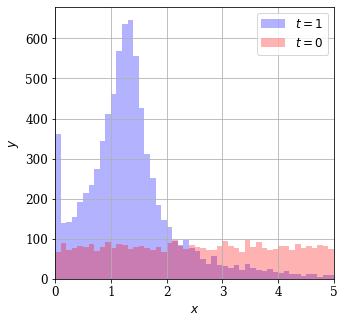

In [7]:
plot_data(data)

### Train, validation, and test sets
There is some confusion in terminology regarding validation and test samples (or sets). We shall adhere to the defintions given here https://machinelearningmastery.com/difference-test-validation-datasets/):
   
  * __Training Dataset__: The sample of data used to fit the model.
  * __Validation Dataset__: The sample of data used to decide 1) whether the fit is reasonable (e.g., the model has not been overfitted), 2) decide which of several models is the best and 3) tune model hyperparameters.
  * __Test Dataset__: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

The validation set will be some small fraction of the training set and will be used to decide when to stop the training.

In [8]:
# Fraction of the data assigned as test data
fraction = 0.05
# Split data into a part for training and a part for testing
train_data, test_data = train_test_split(data, test_size=fraction)

# Split the training data into a part for training (fitting) and
# a part for validating the training.
fraction = 5/95
train_data, valid_data = train_test_split(train_data, test_size=fraction)

print('train set size:        %6d' % train_data.shape[0])
print('validation set size:   %6d' % valid_data.shape[0])
print('test set size:         %6d' % test_data.shape[0])

train set size:         90000
validation set size:     5000
test set size:           5000


Split data into targets $t$ and inputs $\mathbf{x}$

In [9]:
def split_t_x(df, inputs=['x', 'a', 'c']):
    # change from pandas dataframe format to a numpy 
    # array of the specified types
    t = np.array(df['target']).astype(np.long)
    x = np.array(df[inputs]).astype(np.float32)
    return (t, x)

train_t, train_x = split_t_x(train_data)
valid_t, valid_x = split_t_x(valid_data)
test_t,  test_x  = split_t_x(test_data)

In [10]:
device  = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Return a (random) batch of data from the training set

In [11]:
def get_batch(x, t, batch_size):
    # the numpy function choice(length, number)
    # selects at random "batch_size" integers from 
    # the range [0, length-1] corresponding to the
    # row indices.
    rows    = rnd.choice(len(x), batch_size)
    batch_x = x[rows]
    batch_t = t[rows]
    return (batch_x, batch_t)

### Empirical risk (that is, average loss)

The empirical risk, which is the __objective function__ we shall minimize, is defined as

\begin{align}
R_M(\omega) & = \frac{1}{M}\sum_{m=1}^M L(t_m, f_m),
\end{align}

where 

\begin{align}
    f_m & \equiv f(\mathbf{x}_m, \omega),\\ \textrm{and} & \\
    L(t, f) &= (f - t)^2 .
\end{align}

The empirical risk $R_M$ approximates the __risk__

\begin{align}
R[f] & = \int \cdots \int \, p(t, \mathbf{x}) \, L(t, f(\mathbf{x}, \theta)) \, dt \, d\mathbf{x},
\end{align}

which is a __functional__ of the model $f$. The quantity $p(t, \mathbf{x}) \, dt\, d\mathbf{x}$ is the probability distribution from which the sample $\{ (t_m, \mathbf{x}_m), m = 1,\cdots, M \}$ is presumed to have been drawn. 

In [12]:
def average_loss(f, t):
    # note: f and t must be of the same shape. 
    losses = (f - t)**2
    return torch.mean(losses) 

### Define accuracy of model

Let's define accuracy as the fraction of the sample that is correctly classified. Recall, that if we use either the __quadratic loss__ 

$$L(t, f) = (t - f)^2$$

or the __cross entropy loss__

$$L(t, f) =- [t \, \ln(f) + (1 - t) \ln(1-f)],$$

the model $f(\mathbf{x}, \omega)$ will approximate,

$$f(\mathbf{x}, \omega^*) \approx p(1 | \mathbf{x}) 
= \frac{p(\mathbf{x} | 1) \, p(1)}{p(\mathbf{x} | 1) \, p(1) + p(\mathbf{x} | 0) \, p(0)},$$

provided that
   1. We have a lot of training data (strictly, an infinite amount).
   2. We have a sufficienty flexible model $\forall \, \mathbf{x}$.
   3. We have an effective optimizer so that we can find the best fit parameter point $\theta^*$.

### Function to execute training loop

Note, here we use $t$ and $y$ interchangeably to denote the targets

In [13]:
def train(model, optimizer, avloss, getbatch,
          train_x, train_t, 
          valid_x, valid_t,
          batch_size, 
          n_iterations, step=10):
    
    xx   = []
    yy_t = []
    yy_v = []
    
    n = len(valid_x)

    print('Average loss')
    print("%10s\t%10s\t%10s" % \
          ('iteration', 'train-set', 'valid-set'))
    
    for ii in range(n_iterations):
        # set mode to training so that training specific operations such 
        # as dropout are enabled.
        model.train()
           
        # Get a random sample (a batch) of images (as numpy arrays)
        batch_x, batch_t = getbatch(train_x, train_t, batch_size)
        
        # Convert the numpy arrays batch_x and batch_t, to tensor 
        # types. The PyTorch tensor type is the magic that permits 
        # automatic differentiation with respect to parameters. 
        # However, since we do not need to take the derivatives
        # with respect to x and t, we disable this feature
        with torch.no_grad(): 
            x = torch.from_numpy(batch_x).to(device)
            t = torch.from_numpy(batch_t).to(device)     

        # compute the output of the model for the batch of data x
        # make sure shape of outputs is the same as shape of targets, t
        outputs = model(x).reshape(t.shape)
        
        # compute a noisy approximation to the average loss
        empirical_risk = avloss(outputs, t)
        
        # use automatic differentiation to compute a 
        # noisy approximation of the local gradient
        optimizer.zero_grad()       # clear previous gradients
        empirical_risk.backward()   # compute gradients
        
        # Finally, advance one step in the direction of steepest 
        # descent, using the noisy local gradient. 
        optimizer.step()            # move a single step
        
        if ii % step == 0:
            # compute a validation measure using the model 
            # given its current parameters.
            acc_v = validate(model, valid_x, valid_t)
            acc_t = validate(model, train_x[:n], train_t[:n]) 
            
            # print on same line
            print("\r%10d\t%10.4f\t%10.4f" % (ii, acc_t, acc_v), end='')
        
            xx.append(ii)
            yy_t.append(acc_t)
            yy_v.append(acc_v)
            
    return (xx, yy_t, yy_v)

In [14]:
def validate(model, inputs, targets):
    # make sure we set evaluation mode so that training specific
    # operations such as dropout are disabled.
    model.eval() # evaluation mode
    
    with torch.no_grad(): # no need to compute gradients wrt. x and y
        x = torch.from_numpy(inputs).to(device)
        t = torch.from_numpy(targets).to(device)
        # remember to reshape
        p = model(x).reshape(t.shape)  # predict probabilities p(1|x)
    return average_loss(p, t)

In [15]:
def plot_average_loss(traces):
    
    xx, yy_t, yy_v = traces
    
    # create an empty figure
    fig = plt.figure(figsize=(8, 5))
    fig.tight_layout()
    
    # add a subplot to it
    nrows, ncols, index = 1,1,1
    ax  = fig.add_subplot(nrows,ncols,index)

    ax.set_title("Average loss", fontsize=FONTSIZE)
    
    ax.plot(xx, yy_t, 'b', lw=2, label='Training')
    ax.plot(xx, yy_v, 'r', lw=2, label='Validation')

    ax.set_xlabel('Iterations', fontsize=FONTSIZE)
    ax.set_ylabel('average loss', fontsize=FONTSIZE)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which="both", linestyle='-')
    ax.legend(loc='upper right')

    plt.show()

### Define model 

$$f(\mathbf{x}, \omega) = \mbox{sigmoid}(b_2 + \mathbf{w}_2 \,\mbox{relu}(\,\mathbf{b}_1 + \mathbf{w}_1 \, \mbox{relu}(\mathbf{b}_0 + \mathbf{w}_0 \, \mathbf{x}) \, ) \,).$$

Note that the value of this model is a scalar, therefore, $b_2$ in this exercise is a scalar $b_2$. 

In [16]:
# Instead of creating our own class, let's just use the 
# Sequential class since it is sufficient for our simple model.
# Try to guess what's going on here.
model = nn.Sequential(nn.Linear(  3, 700),  nn.ReLU(),
                      nn.Linear(700, 600),  nn.ReLU(),
                      nn.Linear(600,   1),  nn.Sigmoid()).to(device)

print (model)

Sequential(
  (0): Linear(in_features=3, out_features=700, bias=True)
  (1): ReLU()
  (2): Linear(in_features=700, out_features=600, bias=True)
  (3): ReLU()
  (4): Linear(in_features=600, out_features=1, bias=True)
  (5): Sigmoid()
)


### Train!

Instantiate an optimizer, then train

Recall, that every step in the iteration is given by

$$\theta_\mbox{new} = \theta_\mbox{current} - \eta \, \nabla R_M,$$

where $\eta$ is called the *learning rate*. We start with a relatively large value of $\eta$ and we gradually decrease it. Why?

#### Specify a path
PATH = "entire_model.pt"
#### Save
torch.save(net, PATH)
#### Load
model = torch.load(PATH)

model.eval()

In [21]:
n_batch      = 100
n_iterations = 1000001

optimizer    = torch.optim.SGD(model.parameters(), 
                               lr=8.e-4,
                               momentum=0.5,
                               weight_decay=1.e-6)

traces = train(model.to(device), optimizer, average_loss, get_batch,
               train_x, train_t, valid_x, valid_t,
               n_batch, n_iterations, step=1000)

torch.save(model, '%s/03_likelihood.pth' % BASE)

Average loss
 iteration	 train-set	 valid-set
   1000000	    0.0829	    0.0854

In [24]:
def plot_average_loss(traces):
    
    xx, yy_t, yy_v = traces
    
    # create an empty figure
    fig = plt.figure(figsize=(8, 5))
    # add a subplot to it
    nrows, ncols, index = 1,1,1
    ax  = fig.add_subplot(nrows,ncols,index)
    ax.set_xlim((0, xx[-1]))
    #ax.set_xscale('log')
    ax.set_yscale('log')
    
    plt.plot(xx, yy_t, 'b', label='Training')
    plt.plot(xx, yy_v, 'r', label='Validation')
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.grid(True, which="both", linestyle='-')
    plt.legend(loc='upper right')
    plt.savefig('%s/03_average_loss.png')
    plt.show()

In [17]:
plot_average_loss(traces)

### Plot distribution

In [26]:
def plot_distributions(p, t):
    ps = p[t > 0.5] # probabilities for class with t == 1
    pb = p[t < 0.5] # probabilities for class with t == 0
    
    # create an empty figure
    fig = plt.figure(figsize=(5, 5))
    fig.tight_layout()
    
    # add a subplot to it
    nrows, ncols, index = 1,1,1
    ax  = fig.add_subplot(nrows,ncols,index)
    ax.set_xlim(0, 1)

    ax.hist(ps, bins=50, color='b',
            histtype='stepfilled',
            alpha=0.3, label='$t = 1$')
    
    ax.hist(pb, bins=50, color='r',
            histtype='stepfilled',
            alpha=0.3, label='$t = 0$')
    
    ax.set_xlabel('$p(1|x)$', fontsize=FONTSIZE)
    ax.legend(loc='upper right')

    plt.show()

### Compute $p(1 | x)$

In [27]:
def compute_prob(model, xx):
    # convert from numpy array to a torch tensor of type float
    x = torch.from_numpy(xx).float().to(device)

    # compute p(1|x)
    model.eval() # evaluation mode
    p = model(x).to(device)

    # squeeze() removes extraneous dimensions
    p = p.squeeze()

    # detach().numpy() converts back to a numpy array
    p = p.detach().cpu().numpy()
    return p

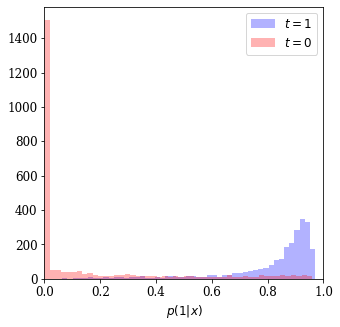

In [28]:
p = compute_prob(model, test_x)
plot_distributions(p, test_t)

### Plot Receiver Operating Characteristic (ROC) curve

In [29]:
def plot_roc_curve(p, t):
    bad, good, _ = roc_curve(t, p)
    roc_auc = auc(bad, good)

    fig = plt.figure(figsize=(5, 5))
    fig.tight_layout()
    ax  = fig.add_subplot(1,1,1)
    
    ax.plot(bad, good, color='red',
            lw=1, label='ROC curve, AUC = %0.2f)' % roc_auc)
    
    ax.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
    
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel(r'fraction$(t=0)$', fontsize=18)
    ax.set_ylabel(r'fraction$(t=1)$', fontsize=18)
    ax.legend(loc="lower right", fontsize=14)
    
    plt.savefig('03_likelihood_roc.png')
    plt.show()

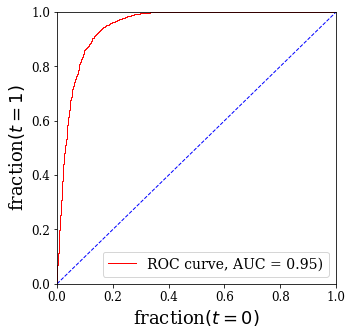

In [30]:
plot_roc_curve(p, test_t)

### Plot approximate likelihood $p(x | \theta, 1)$

In [31]:
def likelihood(x, a, c, model):
    X = np.array([(z, a, c) for z in x])
    D = model(torch.tensor(X).float()).squeeze().detach().numpy()
    p = D / (1-D)
    p /= p.max()
    return p

In [32]:
def plot_gengamma(a, c, model, xmin=0, xmax=10, xstep=0.01):
    import matplotlib.gridspec as gridspec
    xmax  =  xmax - xstep
    nmax  = len(a)
    ncols = 4
    nrows = int(nmax/ncols) + (1 if nmax % ncols > 0 else 0)

    x  = np.arange(xmin, xmax+xstep, xstep)
    kolor = ['black', 'gray', 'red', 'orange', 'gold', 'brown', 
             'darkgreen', 'green', 'blue', 'indigo', 'violet']

    font = {'family' : 'sans serif',
        'weight' : 'normal',
        'size'   : 12}
    mp.rc('font', **font)

    # create an empty figure
    fig = plt.figure(figsize=(3*ncols, 2*nrows))

    gs = gridspec.GridSpec(nrows, ncols)
    gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

    i = -1
    for ii, ai, ci in zip(range(nmax), a, c):
        i += 1
        if i >= len(kolor):
            i = 0

        ax = plt.subplot(gs[ii])
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([0.0, 1.2])
        ax.grid(True, which="both", linestyle='-')
        ax.tick_params(direction='in')

        index = ii+1
        first_column = index % ncols == 1
        row   = int(ii / ncols)
        last_row = row == nrows-1

        if last_row:
          ax.set_xlabel('$x$')
        else:
          ax.set_xticklabels([])

        if first_column:
          ax.set_ylabel('$p(x|a, c)$')
        else:
          ax.set_yticklabels([])

        y = st.gengamma.pdf(x, ai, ci)
        y = y / y.max()
        ax.plot(x, y, color=kolor[i], label='exact')
        
        p = likelihood(x, ai, ci, model)
        ax.plot(x, p, color=kolor[i], linestyle='-.', label='model')
        ax.legend(loc='upper right', fontsize=10)

        ax.text(4.1, 0.55, '$a = %4.1f$' % ai)
        ax.text(4.1, 0.35, '$c = %4.1f$' % ci)

    #fig.tight_layout()
    plt.savefig('%s/03_likelihood.png' % BASE)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


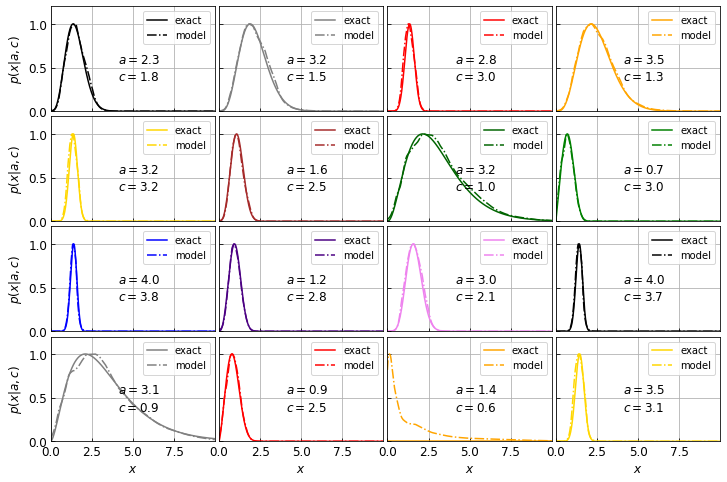

In [33]:
mp.rc('text', usetex=False)
N = 16
a = rnd.uniform(0.5, 4.0, N)
c = rnd.uniform(0.5, 4.0, N)
plot_gengamma(a, c, model.to('cpu'))